In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

In [1]:
 pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 58.9 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import random
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# المسار الرئيسي للبيانات
data_dir = "/kaggle/input/eurosat-dataset/EuroSATallBands"  # ← غيّره لمسار البيانات على جهازك

# الحصول على أسماء الكلاسات (مجلدات)
class_names = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# عدد الصور اللي هنعرضها
num_samples = 9
samples = []

# نختار صور عشوائية من كلاس مختلفة
for _ in range(num_samples):
    class_name = random.choice(class_names)
    class_dir = os.path.join(data_dir, class_name)
    image_file = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, image_file)
    samples.append((image_path, class_name))

# نعرض الصور
plt.figure(figsize=(12, 12))

for i, (img_path, label) in enumerate(samples):
    with rasterio.open(img_path) as src:
        # نستخدم أول 3 باند (غالباً Red, Green, Blue)
        image = src.read([1, 2, 3])  # (C, H, W)

    # تحويل الصورة إلى (H, W, C) وترجمتها لـ RGB طبيعي
    image = np.transpose(image, (1, 2, 0))
    image = image.astype(np.uint8)

    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.suptitle("Sample EuroSAT Images (RGB)", fontsize=18)
plt.tight_layout()
plt.show()


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# المسار الرئيسي للبيانات
data_dir = "/kaggle/input/eurosat-dataset/EuroSATallBands"

# الحصول على أسماء الكلاسات (10 كلاس)
class_names = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
class_names.sort()  # لترتيب ثابت

# تأكد إن عندك 10 كلاس
assert len(class_names) == 10, f"Expected 10 classes, found {len(class_names)}"

# ناخد صورة واحدة من كل كلاس
samples = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    image_file = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, image_file)
    samples.append((image_path, class_name))

# تجهيز الشكل باستخدام fig, ax
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 صفوف، 5 أعمدة
axes = axes.flatten()

# نعرض الصور
for i, (img_path, label) in enumerate(samples):
    with rasterio.open(img_path) as src:
        red = src.read(4).astype(np.float32)
        green = src.read(3).astype(np.float32)
        blue = src.read(2).astype(np.float32)

    # نعمل normalization لكل باند إلى [0, 1]
    def normalize(band):
        return (band - band.min()) / (band.max() - band.min() + 1e-6)

    red = normalize(red)
    green = normalize(green)
    blue = normalize(blue)

    rgb = np.stack([red, green, blue], axis=-1)  # (H, W, C)

    axes[i].imshow(rgb)
    axes[i].set_title(label)
    axes[i].axis('off')

fig.suptitle("Sample EuroSAT Images (RGB)", fontsize=20)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
fig.savefig("eurosat_samples.png")  # حفظ الصورة
plt.show()


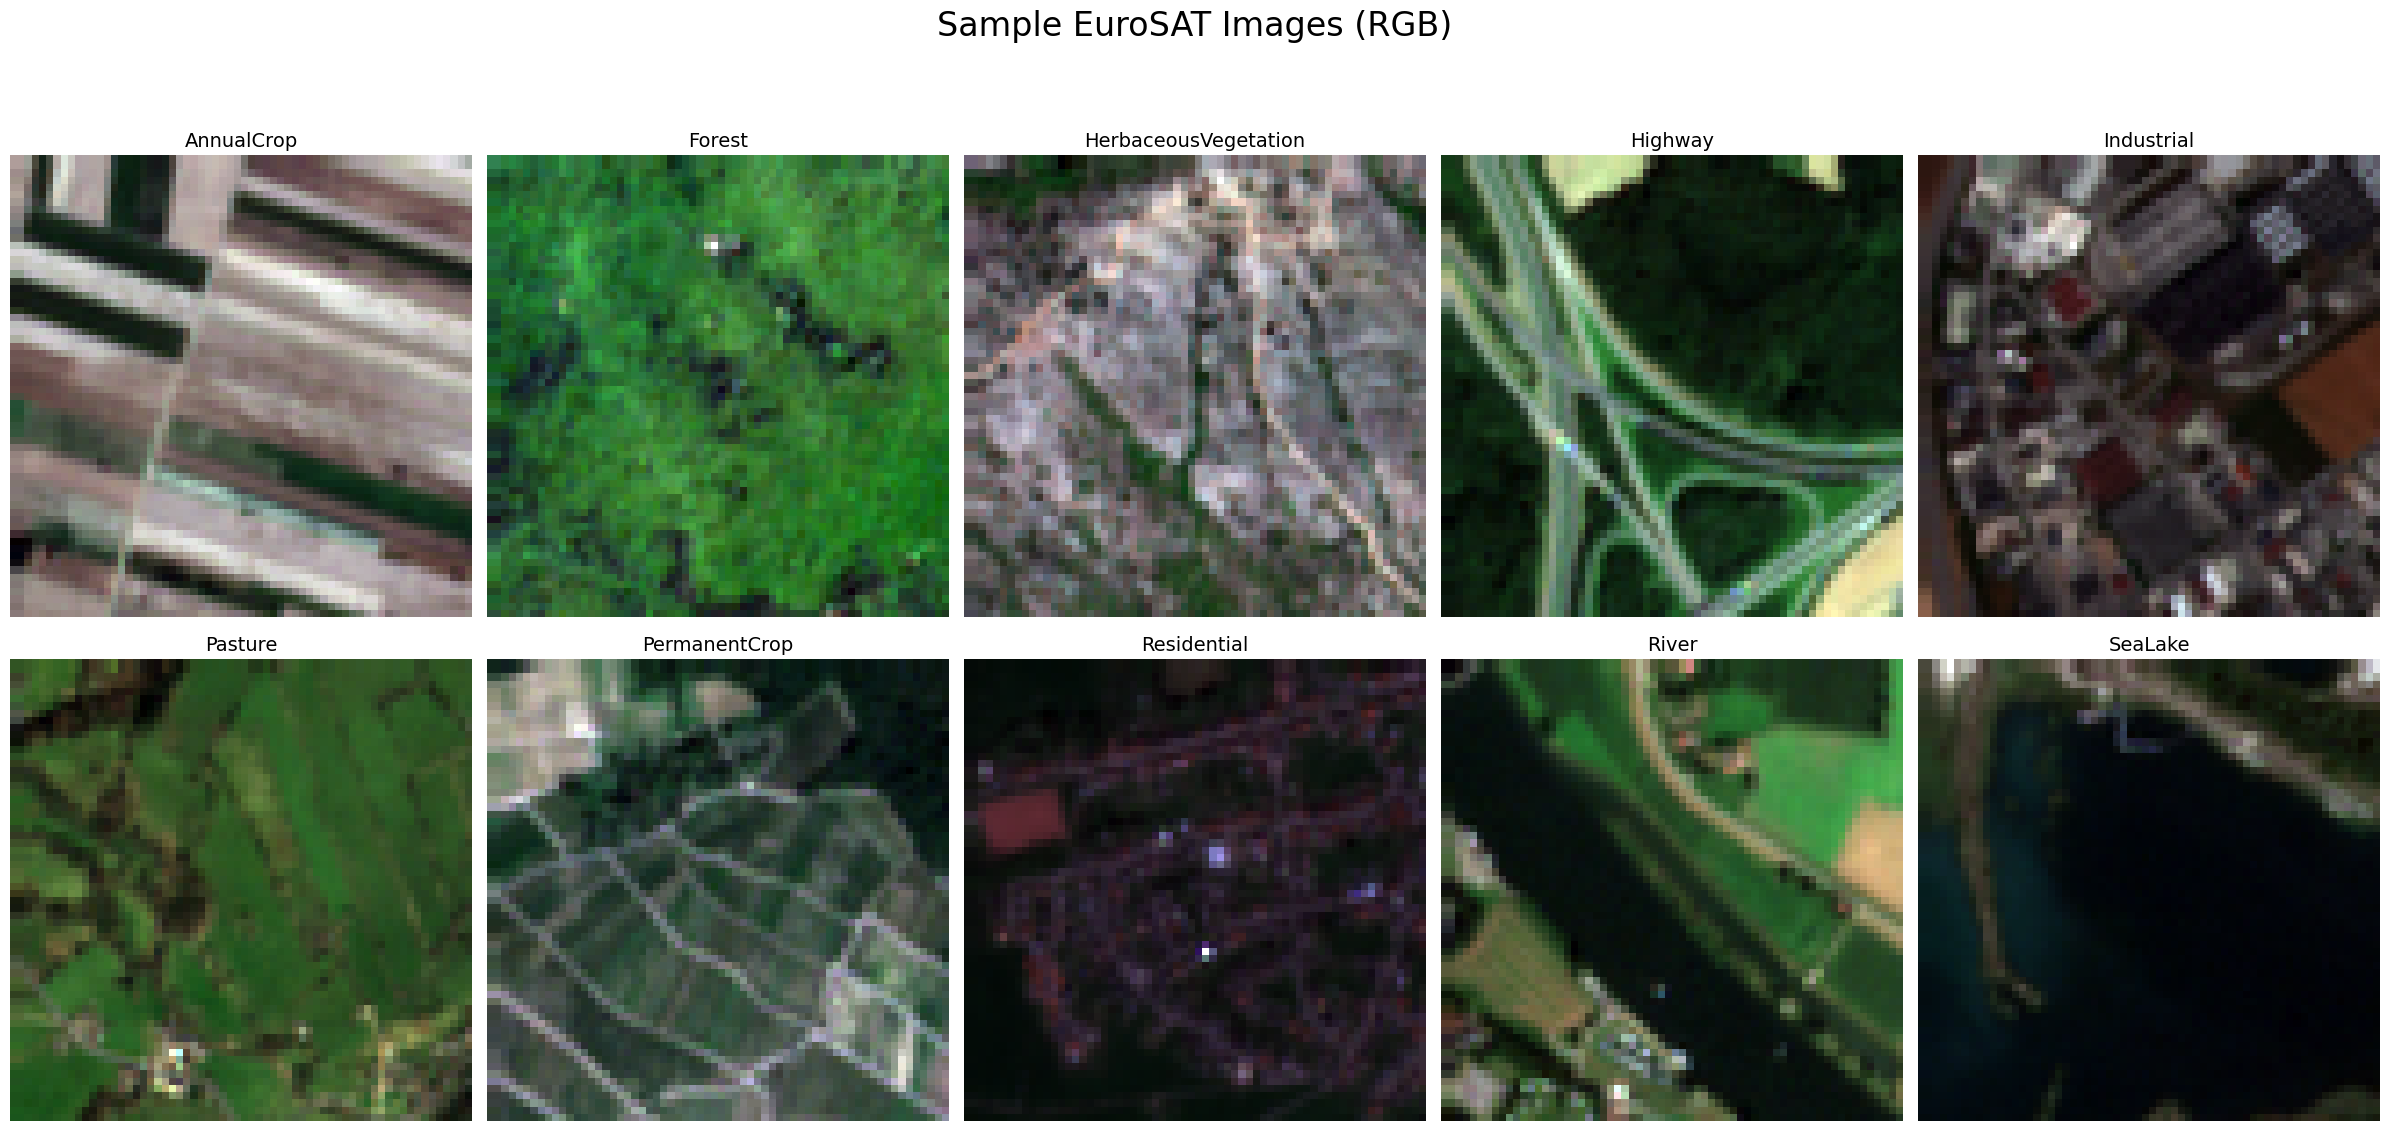

In [23]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# المسار الرئيسي للبيانات
data_dir = "/kaggle/input/eurosat-dataset/EuroSATallBands"

# الحصول على أسماء الكلاسات (10 كلاس)
class_names = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
class_names.sort()  # ترتيب ثابت

# تأكد إن عندك 10 كلاس
assert len(class_names) == 10, f"Expected 10 classes, found {len(class_names)}"

# ناخد صورة واحدة من كل كلاس
samples = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    image_file = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, image_file)
    samples.append((image_path, class_name))

# تجهيز الشكل باستخدام fig, ax - مكبر الحجم
fig, axes = plt.subplots(2, 5, figsize=(24, 12))  # 2 صفوف، 5 أعمدة
axes = axes.flatten()

# نعرض الصور
for i, (img_path, label) in enumerate(samples):
    with rasterio.open(img_path) as src:
        red = src.read(4).astype(np.float32)
        green = src.read(3).astype(np.float32)
        blue = src.read(2).astype(np.float32)

    # نعمل normalization لكل باند إلى [0, 1]
    def normalize(band):
        return (band - band.min()) / (band.max() - band.min() + 1e-6)

    red = normalize(red)
    green = normalize(green)
    blue = normalize(blue)

    rgb = np.stack([red, green, blue], axis=-1)  # (H, W, C)

    axes[i].imshow(rgb)
    axes[i].set_title(label, fontsize=14)
    axes[i].axis('off')

fig.suptitle("Sample EuroSAT Images (RGB)", fontsize=24)
plt.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig("eurosat_samples.png", dpi=300)  # حفظ الصورة بجودة عالية
plt.show()
